### Step 1: Importing the Relevant Libraries

In [192]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

Step 2: Data Inspection

In [193]:
train = pd.read_csv('/content/sample_data/train_v9rqX0R.csv')
test = pd.read_csv('/content/sample_data/test_AbJTz2l.csv')
train = train.drop(['Outlet_Establishment_Year','Item_Identifier'],axis = 'columns')
test = test.drop(['Item_Identifier','Outlet_Establishment_Year'],axis = 'columns')




In [194]:
train.shape,test.shape

((8523, 10), (5681, 9))

In [195]:
train.isnull().sum()/train.shape[0]*100

Item_Weight             17.165317
Item_Fat_Content         0.000000
Item_Visibility          0.000000
Item_Type                0.000000
Item_MRP                 0.000000
Outlet_Identifier        0.000000
Outlet_Size             28.276428
Outlet_Location_Type     0.000000
Outlet_Type              0.000000
Item_Outlet_Sales        0.000000
dtype: float64

In [196]:
test.isnull().sum()/test.shape[0]*100

Item_Weight             17.180074
Item_Fat_Content         0.000000
Item_Visibility          0.000000
Item_Type                0.000000
Item_MRP                 0.000000
Outlet_Identifier        0.000000
Outlet_Size             28.269671
Outlet_Location_Type     0.000000
Outlet_Type              0.000000
dtype: float64

We have 17% and 28% of missing values in Item weight and Outlet_Size columns respectively.

In [197]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 6
Numerical Features in Train Set: 4


In [198]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 6
Numerical Features in Test Set: 3


Step 3: Data Cleaning

Why missing values treatment is required? Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction.




In [199]:
train.isnull().sum()
test.isnull().sum()

Item_Weight              976
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             1606
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

3.1 Item Weight

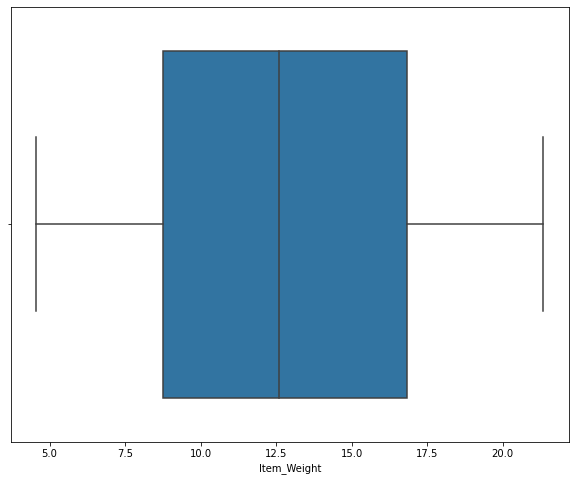

In [200]:
plt.figure(figsize = (10,8))
sns.boxplot('Item_Weight',data = train)

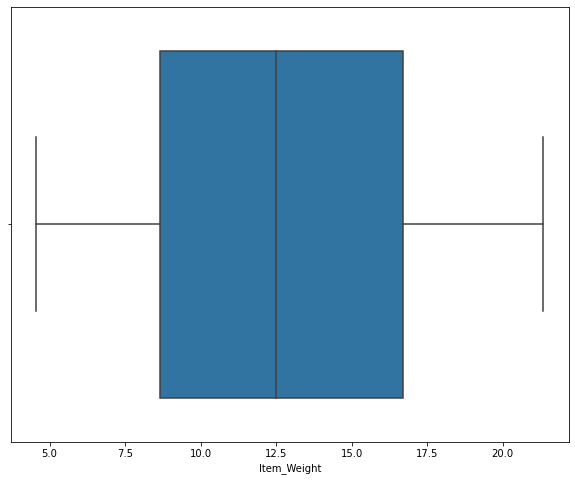

In [201]:
plt.figure(figsize = (10,8))
sns.boxplot('Item_Weight',data = test)

The Box Plots above clearly show no "Outliers" and hence we can impute the missing values with "Mean"

In [202]:
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight']= test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [203]:
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

(0, 0)

We have succesfully imputed the missing values from the column Item_Weight

3.2 : Outlet Size

In [204]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(2410, 1606)

In [205]:
print(train['Outlet_Size'].value_counts())
print('******************************************')
print(test['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
******************************************
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


Since the outlet_size is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column

In [206]:
#Imputing with Mode
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']= test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])


In [207]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(0, 0)

We have succesfully imputed the missing values from the column Outlet_Size.

Step 4: Exploratory Data Analysis

In [208]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052


In [209]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

We see there are some irregularities in the column and it is needed to fix them.

In [210]:
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [211]:
train['Item_Fat_Content']

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

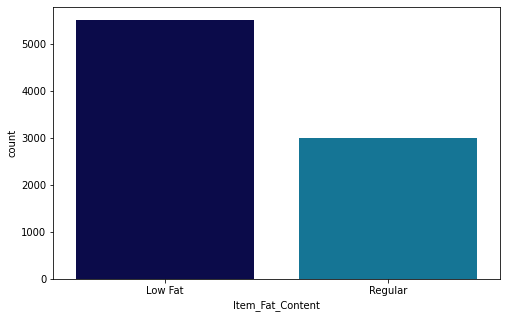

In [212]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=train,palette='ocean')

The Items bought are more of Low Fat.

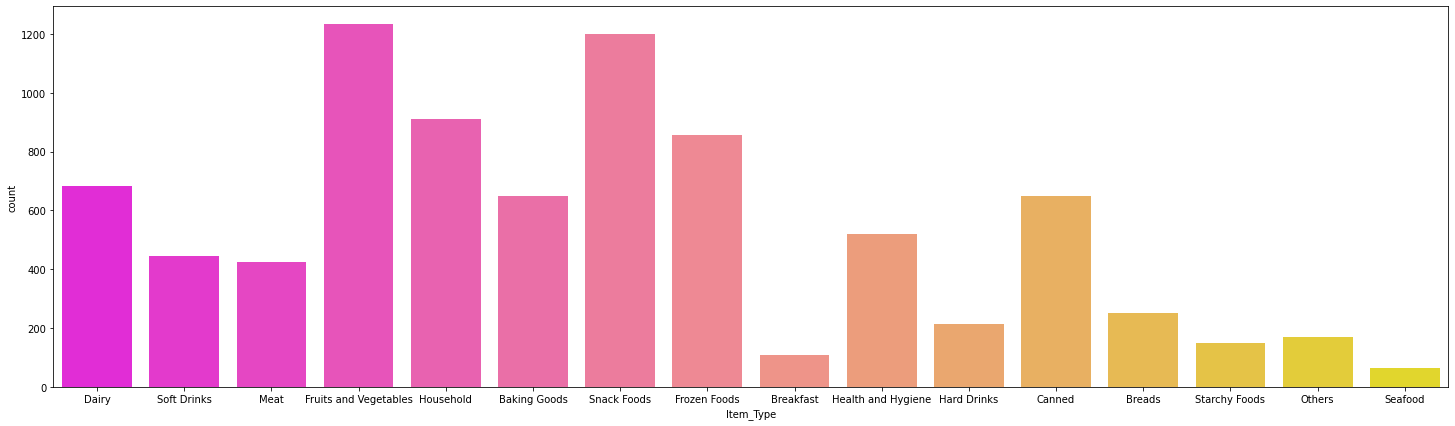

In [213]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Type',data=train,palette='spring')


*   Fruits and Vegetables are largely sold as people tend to use them on daily purpose.

*   Snack Foods too have good sales.




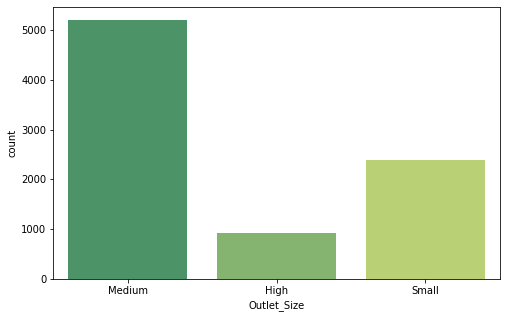

In [214]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=train,palette='summer')

The Outlets are more of Medium Size

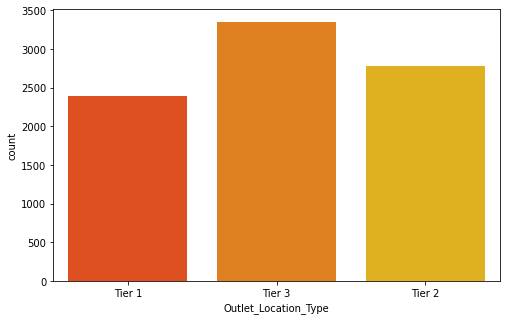

In [215]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type',data=train,palette='autumn')

The Outlets are maximum in number in Tier 3 Cities

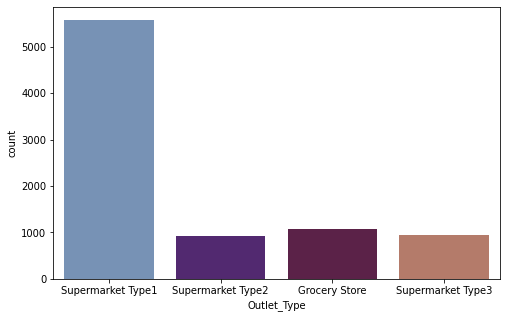

In [216]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=train,palette='twilight')

The Outlets are more of Supermarket Type1

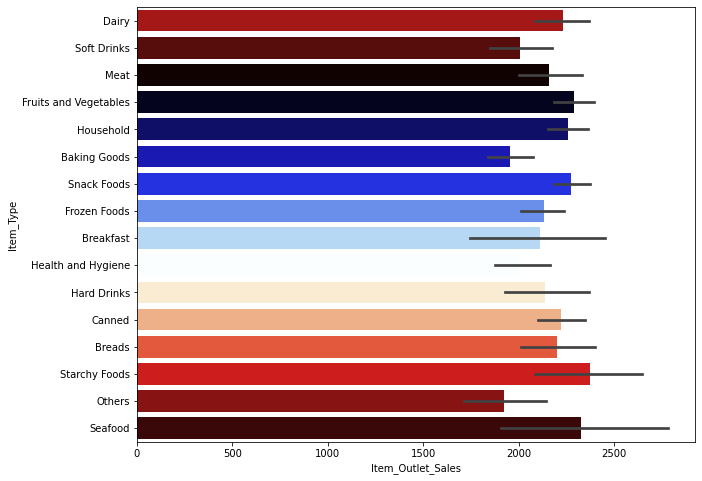

In [217]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train,palette='flag')
#sns.barplot(y='Outlet_Type',x='Item_Outlet_Sales',data=train,palette='flag')

The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.

Step 5: Building Model

In [218]:
#label encoding
le = LabelEncoder()
var_mod = train.select_dtypes(include = 'object').columns
var_mod

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [219]:
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [220]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,9,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,3,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,9,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,0,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1,0,2,1,994.7052


In [221]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train[['Item_MRP']])
train['Item_MRP'] = scaler.transform(train[['Item_MRP']])

scaler.fit(test[['Item_MRP']])
test['Item_MRP'] = scaler.transform(test[['Item_MRP']])

Encoding the required columns from training and test dataset

In [222]:
# Seperate Features and Target
X= train.drop(columns = ['Item_Outlet_Sales'], axis=1)
y= train['Item_Outlet_Sales']

# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

In [223]:
algos = [LinearRegression(),  Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor()]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor']

rmse_list = []
accuracy = []

In [224]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    accuracy.append(model.score(X_valid,y_valid))
    y_pred = model.predict(X_valid)
    MSE= metrics.mean_squared_error(y_valid,y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)

In [225]:
accuracy

[0.49749776987280225,
 0.4975994776260251,
 0.4978749445309477,
 0.2661246911053732,
 0.18037631340687021]

In [226]:
# Model Building
features= X.columns

LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_valid)
coef = pd.Series(LR.coef_,features).sort_values()

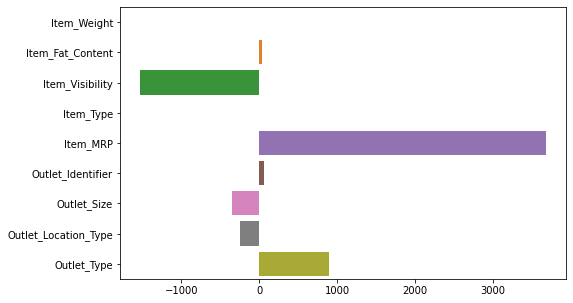

In [227]:
# Barplot for coefficients
plt.figure(figsize=(8,5))
sns.barplot(LR.coef_,features)

Item Visibility, Outlet_Type, Outlet_Size, Outlet_Location_Type are the most important attributes to determine Item_Outlet_Sales.

RMSE


In [228]:
MSE= metrics.mean_squared_error(y_valid,y_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 1246.1519363588081


Validation Set RMSE score is around 1246 from this linear model

In [232]:
l=Lasso()
l.fit(X_train,y_train)
y_pred = l.predict(X_valid)

In [233]:
# for submission
submission = pd.read_csv('/content/sample_submission_8RXa3c6.csv')
final_predictions = LR.predict(test)
final_predictions = l.predict(test)
submission['Item_Outlet_Sales'] = final_predictions
#only positive predictions for the target variable
submission['Item_Outlet_Sales'] = submission['Item_Outlet_Sales'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission.csv', index=False)